In [ ]:
# This project tries to find the number from noisy data directly.

In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
numbers = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = numbers.load_data()

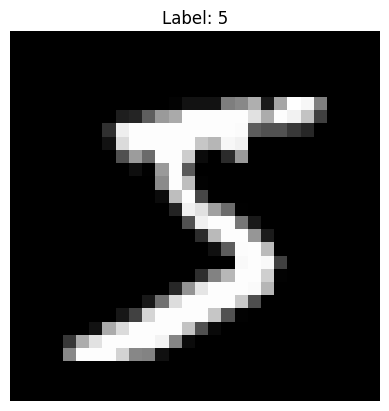

Label: 5


In [8]:
# Plot sample images from the dataset with greyscale colormap
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Label: {train_labels[0]}')
plt.axis('off')
plt.show()
print("Label:", train_labels[0])

In [4]:
# Preprocess the data by normalizing pixel values
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [9]:
# Create noisy versions of the images
noise_factor = 0.5

x_train_noisy = train_images + noise_factor * np.random.randn(*train_images.shape)
x_test_noisy  = test_images  + noise_factor * np.random.randn(*test_images.shape)

# Clip values to stay in [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy  = np.clip(x_test_noisy, 0., 1.)

Label: 5


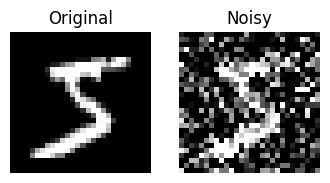

In [11]:
# Plot original vs noisy image
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(train_images[0], cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_train_noisy[0], cmap='gray')
plt.title("Noisy")
plt.axis('off')
print("Label:", train_labels[0])

In [12]:
# Build denoising autoencoder model
ae_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

/Users/chamundeshwarivadamalai/Desktop/NeuralNetworks_NumberIdentification/nn_numb_id/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compile the model
ae_model.compile(optimizer='adam', 
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
ae_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,810 (2.08 MB)

 Trainable params: 545,810 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
ae_history = ae_model.fit(x_train_noisy,
                          train_labels,
                          batch_size=100,
                          epochs = 10,
                          validation_data=(x_test_noisy, test_labels)
                          )

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8214 - loss: 0.5569 - val_accuracy: 0.8777 - val_loss: 0.3782
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9079 - loss: 0.2887 - val_accuracy: 0.9025 - val_loss: 0.3046
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9406 - loss: 0.1829 - val_accuracy: 0.9150 - val_loss: 0.2645
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9638 - loss: 0.1147 - val_accuracy: 0.9168 - val_loss: 0.2742
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9780 - loss: 0.0683 - val_accuracy: 0.9177 - val_loss: 0.2916
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9865 - loss: 0.0432 - val_accuracy: 0.9009 - val_loss: 0.4165
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9869 - loss: 0.0387 - val_accuracy: 0.9220 - val_loss: 0.3437
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9889 - loss: 0.0315 - val_accuracy

In [15]:
# Plotting functions for predictions
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy Loss')
    plt.ylim([0,1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

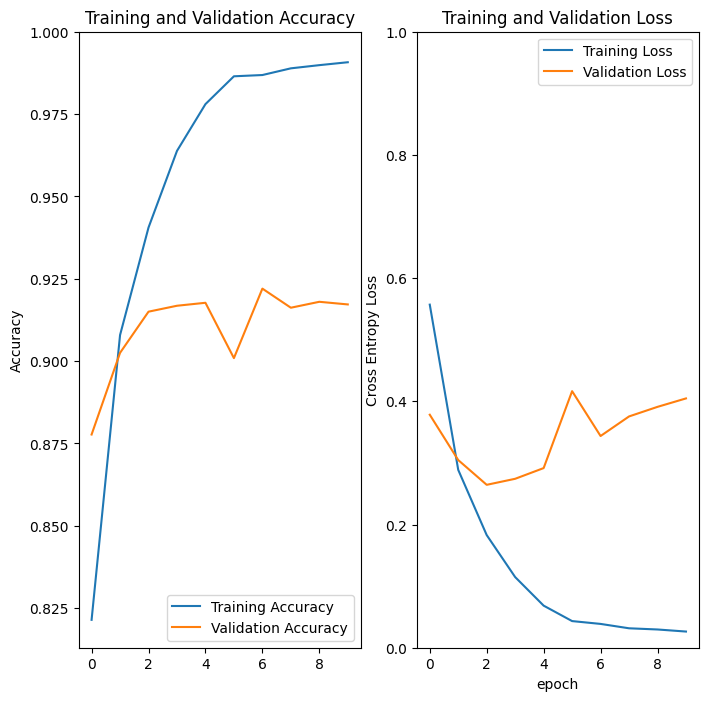

In [16]:
# Plot accuracy and loss
plot_accuracy_and_loss(ae_history)

In [18]:
train_acc = ae_history.history['accuracy'][-1]
train_loss = ae_history.history['loss'][-1]
val_acc = ae_history.history['val_accuracy'][-1]
val_loss = ae_history.history['val_loss'][-1]

print(f"Final Training Accuracy on noisy data:   {train_acc:.4f}")
print(f"Final Training Loss on noisy data:       {train_loss:.4f}")
print(f"Final Validation Accuracy on noisy data: {val_acc:.4f}")
print(f"Final Validation Loss on noisy data:     {val_loss:.4f}")


Final Training Accuracy on noisy data:   0.9907
Final Training Loss on noisy data:       0.0263
Final Validation Accuracy on noisy data: 0.9172
Final Validation Loss on noisy data:     0.4047
